# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import sys

import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from PIL import Image
from skimage.transform import rescale, resize, rotate
from skimage.color import gray2rgb, rgb2gray
from skimage import transform, filters, exposure

from tensorflow.contrib.layers import flatten

from scipy.ndimage.interpolation import rotate

import platform
%matplotlib inline

if platform.system() == "Darwin":
    baseDir = "./model"
else:
    baseDir = "./model"
    

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape,y_train.shape)

(34799, 32, 32, 3) (34799,)


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:2]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32,)
Number of classes = 43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [4]:
# 
# check bias (data distribution) for label data on each data set (train test valid)
# whether any specific label has huge data segment compared with other label data
# Ultimately, it is ideal style to have flat distribution for all label data   
#


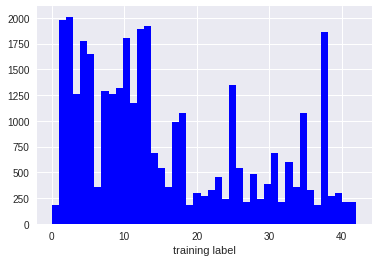

In [5]:
sr_y_train = pd.Series(y_train, name="training label")
p = sns.distplot(sr_y_train, kde = False, bins=n_classes , hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "b"})
fig = p.get_figure()
fig.savefig("plotimage/training_label.png")

#sr_y_train.value_counts()

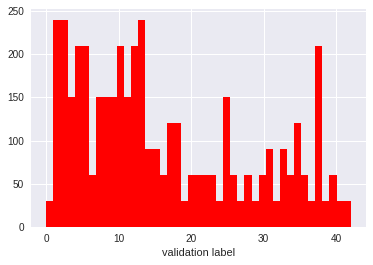

In [6]:
sr_y_valid = pd.Series(y_valid, name="validation label")
p = sns.distplot(sr_y_valid, kde = False,  bins=n_classes , hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "r"})
fig = p.get_figure()
fig.savefig("plotimage/validation_label.png")

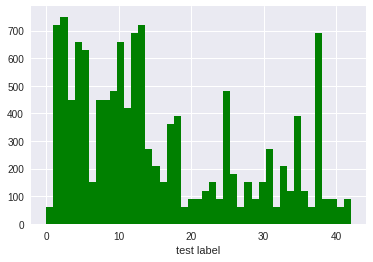

In [7]:
sr_y_test = pd.Series(y_test, name="test label")
p = sns.distplot(sr_y_test, kde = False,  bins=n_classes  , hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "g"})
fig = p.get_figure()
fig.savefig("plotimage/test_label.png")

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [8]:
# check signboard name 
# load csv data into pandas 
signnames = "signnames.csv"
df_signname = pd.read_csv(signnames)
print(df_signname.head())

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


Label 0: Speed limit (20km/h)                      180 samples


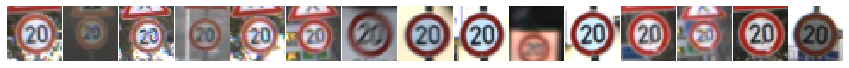

Label 1: Speed limit (30km/h)                      1980 samples


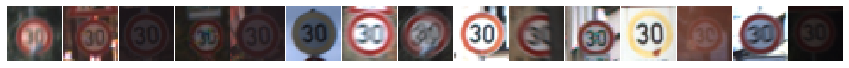

Label 2: Speed limit (50km/h)                      2010 samples


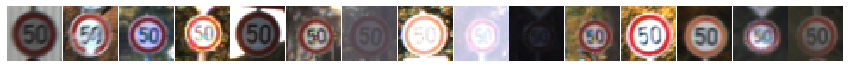

Label 3: Speed limit (60km/h)                      1260 samples


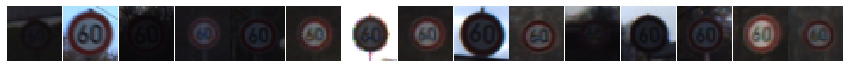

Label 4: Speed limit (70km/h)                      1770 samples


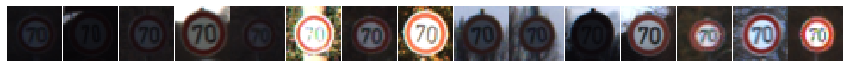

Label 5: Speed limit (80km/h)                      1650 samples


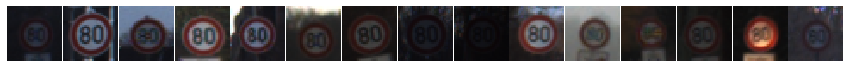

Label 6: End of speed limit (80km/h)               360 samples


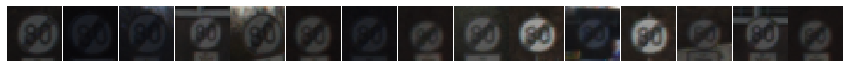

Label 7: Speed limit (100km/h)                     1290 samples


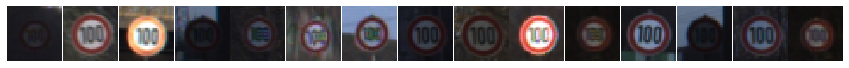

Label 8: Speed limit (120km/h)                     1260 samples


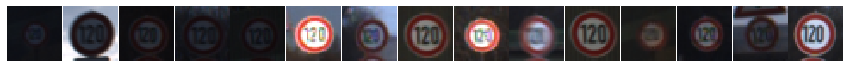

Label 9: No passing                                1320 samples


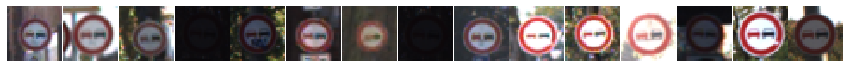

Label 10: No passing for vehicles over 3.5 metric tons  1800 samples


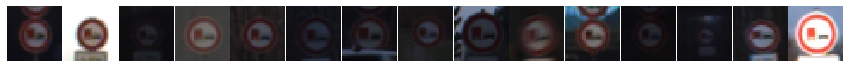

Label 11: Right-of-way at the next intersection     1170 samples


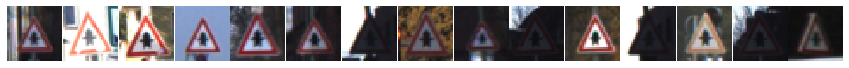

Label 12: Priority road                             1890 samples


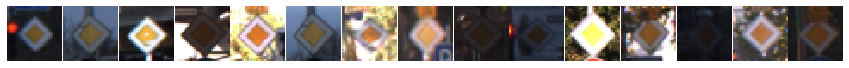

Label 13: Yield                                     1920 samples


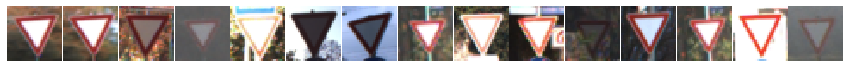

Label 14: Stop                                      690 samples


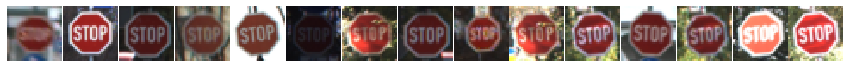

Label 15: No vehicles                               540 samples


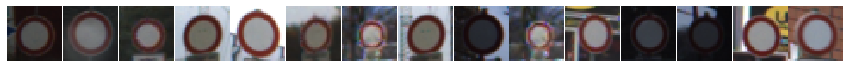

Label 16: Vehicles over 3.5 metric tons prohibited  360 samples


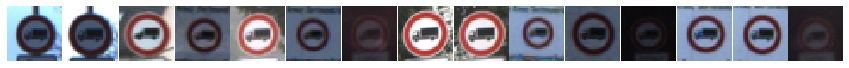

Label 17: No entry                                  990 samples


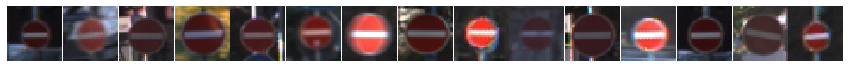

Label 18: General caution                           1080 samples


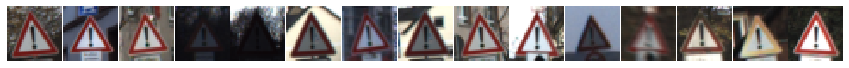

Label 19: Dangerous curve to the left               180 samples


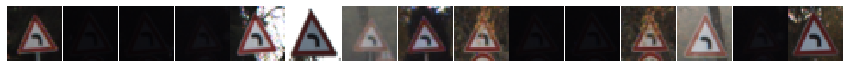

Label 20: Dangerous curve to the right              300 samples


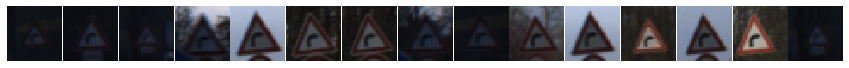

Label 21: Double curve                              270 samples


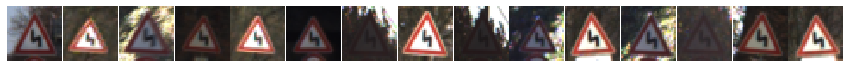

Label 22: Bumpy road                                330 samples


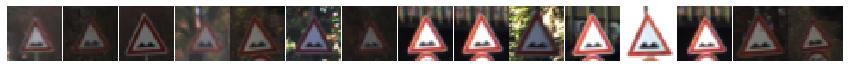

Label 23: Slippery road                             450 samples


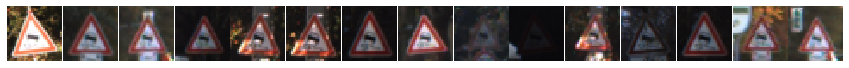

Label 24: Road narrows on the right                 240 samples


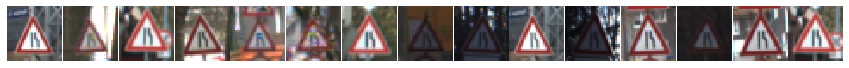

Label 25: Road work                                 1350 samples


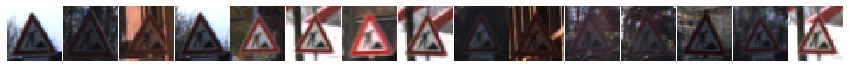

Label 26: Traffic signals                           540 samples


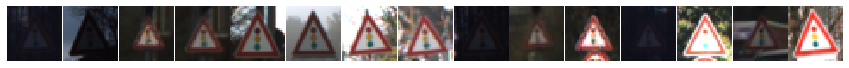

Label 27: Pedestrians                               210 samples


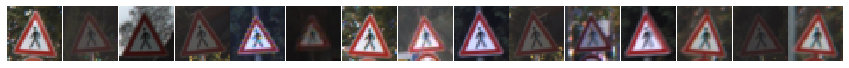

Label 28: Children crossing                         480 samples


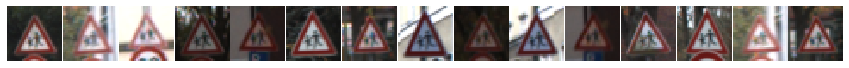

Label 29: Bicycles crossing                         240 samples


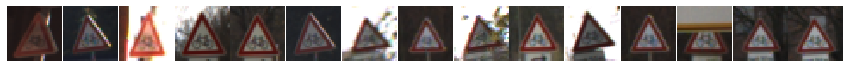

Label 30: Beware of ice/snow                        390 samples


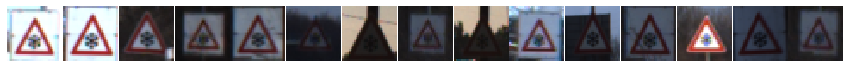

Label 31: Wild animals crossing                     690 samples


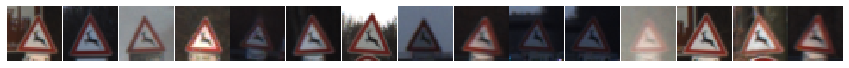

Label 32: End of all speed and passing limits       210 samples


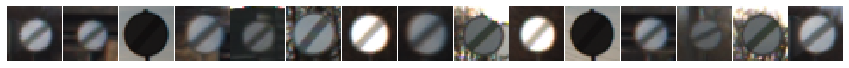

Label 33: Turn right ahead                          599 samples


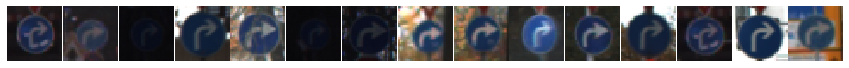

Label 34: Turn left ahead                           360 samples


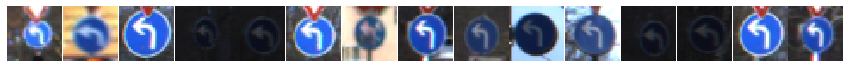

Label 35: Ahead only                                1080 samples


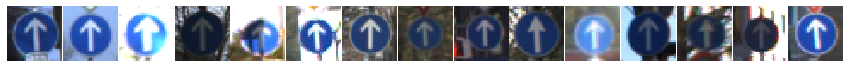

Label 36: Go straight or right                      330 samples


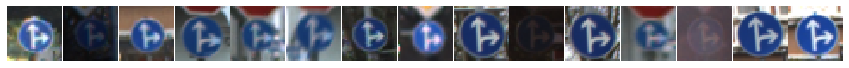

Label 37: Go straight or left                       180 samples


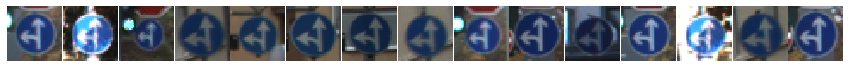

Label 38: Keep right                                1860 samples


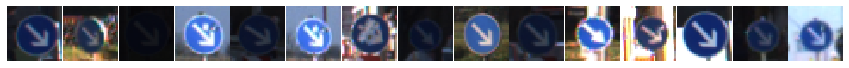

Label 39: Keep left                                 270 samples


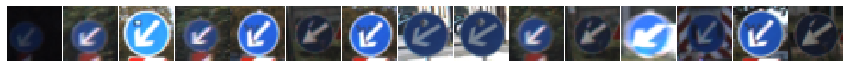

Label 40: Roundabout mandatory                      300 samples


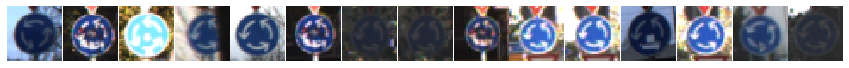

Label 41: End of no passing                         210 samples


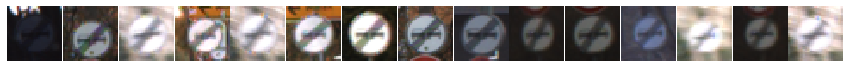

Label 42: End of no passing by vehicles over 3.5 metric tons  210 samples


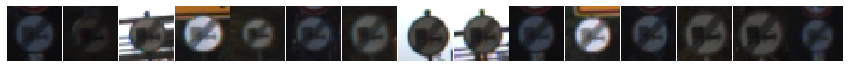

In [9]:
#
# show traffic board on fly 
# pick up 10 random images selected from each signboard categorical data
#
# data : X_train
# 
#
classify_index = df_signname.columns[0]
classify_name = df_signname.columns[1]

# 
train_label_count = sr_y_train.value_counts().to_dict()

for class_id in range(n_classes):

    label_id = df_signname[ classify_index ][class_id] 
    label_name = df_signname[ classify_name ][class_id]
    X_train_selected = X_train[y_train == label_id ]
    data_size = X_train_selected.shape[0]
    r_top10 = np.random.permutation(data_size )[:15]
    #print(r_top10)
    print("Label %i: %-*s  %s samples" % (class_id, 40, label_name, str(train_label_count[class_id])))
    #fig = plt.figure(figsize = (6, 3))
    #fig.subplots_adjust(left = 0, right = 3, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    fig = plt.figure(figsize = (15, 1))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    
    for i, index in enumerate(r_top10):
        axis = fig.add_subplot(1, 15, i + 1, xticks=[], yticks=[])
        axis.imshow( X_train_selected[index]   )
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:

class ImageAugmentationClass(object):

    def __init__(self,test=False):
        self.test = test

    def choiceAugmentation(self,img):

        self.choice_flag = np.random.randint(0, 2, [1, 10]).astype('bool')[0]

        img = self.horizontal_flip(img)
        img = self.horizontal_flip(img)
        return img

    def horizontal_flip(self, image):
        if self.choice_flag[0]:
            image = image[:,::-1,:]
        return image
    def vertical_flip(self, image):
        if self.choice_flag[1]:
            image = image[::-1,:,:]
        return image


    def transform_image(self,img,ang_range,shear_range,trans_range,brightness=0):

        #Advantage function is prepared to show the picture of the same sign from different angles.
        #I have used blended function with using openCV Affine translations and numpy,
        # rotations, translations and shearing parameters should be used.
        # Rotation
        ang_rot = np.random.uniform(ang_range)-ang_range/2
        rows,cols,ch = img.shape
        Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

        # Translation
        tr_x = trans_range*np.random.uniform()-trans_range/2
        tr_y = trans_range*np.random.uniform()-trans_range/2
        Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

        # Shear
        pts1 = np.float32([[5,5],[20,5],[5,20]])

        pt1 = 5+shear_range*np.random.uniform()-shear_range/2
        pt2 = 20+shear_range*np.random.uniform()-shear_range/2

        # Brightness

        pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

        shear_M = cv2.getAffineTransform(pts1,pts2)

        img = cv2.warpAffine(img,Rot_M,(cols,rows))
        img = cv2.warpAffine(img,Trans_M,(cols,rows))
        img = cv2.warpAffine(img,shear_M,(cols,rows))

        #if brightness == 1:
        #  img = augment_brightness_camera_images(img)

        return img


    def random_crop(self,image, crop_size=(32,32)):

        h, w, _ = image.shape
        # determine top left from crop size
        top = np.random.randint(0, h - crop_size[0])
        left = np.random.randint(0, w - crop_size[1])

        # from top, left, size should be calculated plus random (0-32)
        bottom = top + crop_size[0]
        right = left + crop_size[1]

        image = image[top:bottom, left:right, :]
        return image

    def random_rotation(self, img, ang_range=60):

        ang_rot = np.random.uniform(ang_range)-ang_range/2
        rows,cols,ch = img.shape
        Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
        img = cv2.warpAffine(img,Rot_M,(cols,rows))
        
        return img    
    
    def cutout(self, image, mask_size=10):
        # save copy image as mean
        mask_value = image.mean()

        h, w, _ = image.shape
        #
        # select random position 
        #
        top = np.random.randint(0 - mask_size // 2, h - mask_size)
        left = np.random.randint(0 - mask_size // 2, w - mask_size)
        bottom = top + mask_size
        right = left + mask_size

        # if top lef has negative number
        if top < 0:
            top = 0
        if left < 0:
            left = 0

        # fill out mask with average image
        image[top:bottom, left:right, :].fill(mask_value)
        return image

    def random_erasing(self, image_origin, p=0.5, s=(0.02, 0.4), r=(0.3, 3)):
        # mask or not
        if np.random.rand() > p:
            return image_origin
        image = np.copy(image_origin)

        # select random int for masking 
        mask_value = np.random.randint(0, 256)

        h, w, _ = image_origin.shape
        # select random mask size
        mask_area = np.random.randint(h * w * s[0], h * w * s[1])

        # select random mask aspect 
        mask_aspect_ratio = np.random.rand() * r[1] + r[0]

        # select hight and width 
        # amend correct number (reasonable size) if height or width is over actual image size
        mask_height = int(np.sqrt(mask_area / mask_aspect_ratio))
        if mask_height > h - 1:
            mask_height = h - 1
        mask_width = int(mask_aspect_ratio * mask_height)
        if mask_width > w - 1:
            mask_width = w - 1

        top = np.random.randint(0, h - mask_height)
        left = np.random.randint(0, w - mask_width)
        bottom = top + mask_height
        right = left + mask_width
        image[top:bottom, left:right, :].fill(mask_value)
        return image    
    

class ImageProces(object):

    def __init__(self):

        self.imgAugCls = ImageAugmentationClass()

    def data_initialization(self):

        data = self.load_data()
        self.X_train, self.y_train = data['features'], data['labels']
        print("[ImageProcess] train features and label..",self.X_train.shape,self.y_train.shape)

        self.n_train = self.X_train.shape[0]
        self.image_shape = self.X_train.shape[1:2]
        self.n_classes = len(set(self.y_train))

        #self.imagePreprocess()

    def load_data(self):

        training_file = "train.p"
        validation_file="valid.p"
        testing_file = "test.p"

        with open(training_file, mode='rb') as f:
            train = pickle.load(f)

            return train
        print("load train data - ImageProces...")

    def getGrayScale(self,img):

        # About YCrCb
        # The YCrCb color space is derived from the RGB color space and has the following three compoenents.

        # Y – Luminance or Luma component obtained from RGB after gamma correction.
        # Cr = R – Y ( how far is the red component from Luma ).
        # Cb = B – Y ( how far is the blue component from Luma ).

        # This color space has the following properties.

        # Separates the luminance and chrominance components into different channels.
        # Mostly used in compression ( of Cr and Cb components ) for TV Transmission.
        # Device dependent.

        # Observations

        # Similar observations as LAB can be made for Intensity and color components with regard to Illumination changes.
        # Perceptual difference between Red and Orange is less even in the outdoor image as compared to LAB.
        # White has undergone change in all 3 components.

        YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        return np.resize(YCrCb[:,:,0], (32,32,1))

    def rgb2gray(self,rgb):

        r, g, b = rgb[:, :,:,0], rgb[:, :,:,1], rgb[:,:,:,2]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

        return gray

    def imagePreprocess(self):

        ts, imgs_per_sign   = np.unique(self.y_train, return_counts=True)
        avg_per_sign        = np.ceil(np.mean(imgs_per_sign)).astype('uint32')

        print(ts)
        print(imgs_per_sign)
        print("Average Counts per each TrafficSign...", avg_per_sign)

        separated_data = []
        for label_index in ts:
            images_in_this_sign = self.X_train[self.y_train == label_index, ...]
            separated_data.append(images_in_this_sign)

        new_effect_cnt = list( map(lambda x: (3.7 * (avg_per_sign  / x) ).astype(np.int32)  , (imgs_per_sign)  ) )

        whole_aug_image_dict = {}
        new_y_train = []

        for idx, (loop_cnt, sign_images) in enumerate( zip(new_effect_cnt, separated_data)):
            print("label:%d  loop_cnt:%d new augmentation images.:%d " % (ts[idx], loop_cnt, (loop_cnt * imgs_per_sign[idx]))  )
            print("original image shape", sign_images.shape)
            separate_aug_image = sign_images.copy()
        
            for cnt in range(loop_cnt):
                
                rnd = np.random.random()
                X_aug_img = sign_images.copy()
                #
                # random select for augmentation
                #
                choice = np.random.choice(range(4))
                if choice == 0:
                    X_aug_img = list( map( lambda image: self.imgAugCls.transform_image( image,30,5,5  ) , sign_images[:].copy()  ) )
                if choice == 1:
                    X_aug_img = list( map( lambda image: self.imgAugCls.cutout(image), sign_images[:].copy() ) )
                if choice == 2:
                    X_aug_img = list( map( lambda image: self.imgAugCls.random_rotation(image), sign_images[:].copy() ) )
                if choice == 3:
                    X_aug_img = list( map( lambda image: self.imgAugCls.random_erasing(image), sign_images[:].copy() ) )

                    
                    
                X_aug_img_np = np.array(X_aug_img)
                separate_aug_image = np.vstack( (separate_aug_image,X_aug_img_np))

            # save whole images per label into dict
            whole_aug_image_dict[ ts[idx]  ] = separate_aug_image

            len_separate_aug_image = separate_aug_image.shape[0]
            extend_labels = np.full( len_separate_aug_image,  ts[idx]   )
            new_y_train.extend(extend_labels)            
            print("final shape (augment image + original image) per label" , separate_aug_image.shape  )

        ts, imgs_per_sign   = np.unique(new_y_train, return_counts=True)
        print("-"*30)
        print(" new y_train (label) count ..")
        print(ts)
        print(imgs_per_sign)

        all_aug_images = whole_aug_image_dict[ 0  ] # get first label image data
        for k,v in whole_aug_image_dict.items():
            if k == 0: # skip label 0, because it has already saved 
                continue
            all_aug_images = np.vstack( (all_aug_images, v) )

        assert(len(new_y_train) == all_aug_images.shape[0]  )

        print("new image data shape after augmentation." , all_aug_images.shape[0] )
        return all_aug_images, np.array( new_y_train )

    def displayImage(self,images):

        gs1 = gridspec.GridSpec(10, 10)
        gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
        plt.figure(figsize=(10,10))
        for i in range(100):
            ax1 = plt.subplot(gs1[i])
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.set_aspect('equal')
            #img = transform_image(image,20,10,5,brightness=1)

            plt.subplot(10,10,i+1)
            plt.imshow(images[i])
            plt.axis('off')

        plt.show()

    def displayImageDistribution(self,images):

        gs1 = gridspec.GridSpec(10, 10)
        gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
        plt.figure(figsize=(10,10))
        for i in range(100):
            ax1 = plt.subplot(gs1[i])
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.set_aspect('equal')
            #img = transform_image(image,20,10,5,brightness=1)

            plt.subplot(10,10,i+1)
            sns.distplot(images[i].ravel() )
            plt.axis('off')

        plt.show()

    def saveImagesPickle(self,new_train_data):

        bytes_out = pickle.dumps(new_train_data)
        max_bytes = 2**31 - 1
        n_bytes   = sys.getsizeof(bytes_out)

        output_path   = 'train_aug.p'
        with open(output_path, 'wb') as f:
            for idx in range(0, n_bytes, max_bytes):
                f.write(bytes_out[idx:idx+max_bytes])


In [11]:
imgProcCls = ImageProces()
imgProcCls.data_initialization()

X_aug_img, y_train_aug = imgProcCls.imagePreprocess()

[ImageProcess] train features and label.. (34799, 32, 32, 3) (34799,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Average Counts per each TrafficSign... 810
label:0  loop_cnt:16 new augmentation images.:2880 
original image shape (180, 32, 32, 3)
final shape (augment image + original image) per label (3060, 32, 32, 3)
label:1  loop_cnt:1 new augmentation images.:1980 
original image shape (1980, 32, 32, 3)
final shape (augment image + original image) per label (3960, 32, 32, 3)
label:2  loop_cnt:1 new augmentation images.:2010 
original image shape (2010, 32, 32, 3)
final shape (augment image + original image) per label (4020, 32, 32, 3)
label:3  loop_cnt:2 new augmentation images.:25

# Image Balancing data  #
***
Data should be balanced over whole training label get better performance of tensorflow training process, so that I have intentionally increased gap for unbiased labeled data (eg.  speed limit 20km etc.)

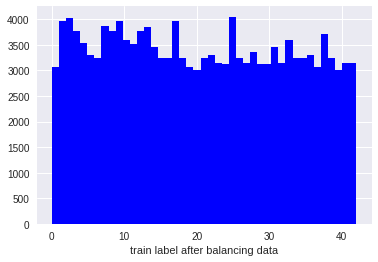

In [12]:
n_classes = 43
sr_y_train_aug = pd.Series(y_train_aug, name="train label after balancing data")
p = sns.distplot(sr_y_train_aug, kde = False,  bins=n_classes  , hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "b"})
fig = p.get_figure()
fig.savefig("plotimage/train_aug.png")

## Image Preprocessing 1 - Image Augmentation ##

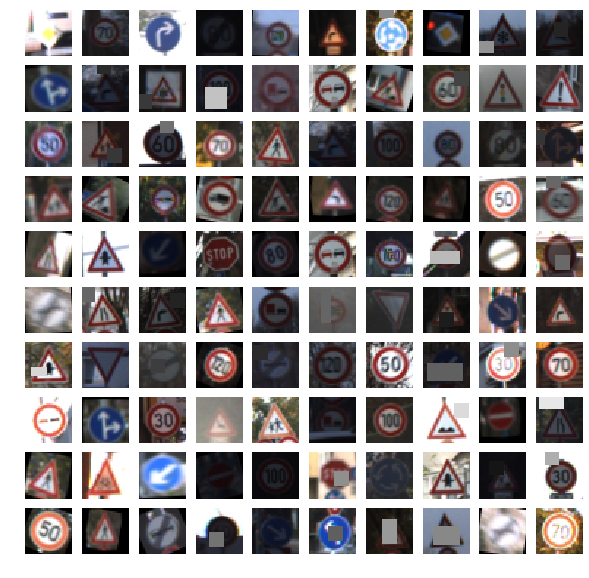

In [13]:

r = np.random.permutation(X_aug_img.shape[0])
X_aug_img_r = X_aug_img[r]
imgProcCls.displayImage(X_aug_img_r)

## Image Convert to Gray Scale ## 

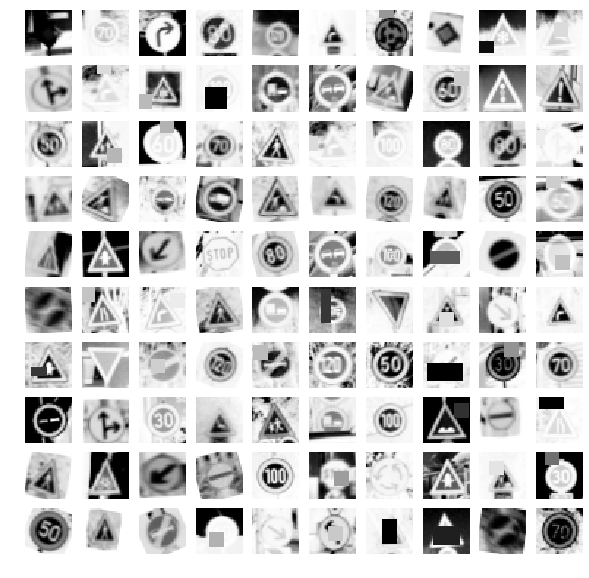

In [14]:
X_aug_gray_img = list( map(lambda im : imgProcCls.getGrayScale(im) , X_aug_img_r[:].copy()   ))
X_aug_gray_img = np.array(X_aug_gray_img)
imshape = X_aug_gray_img.shape
X_aug_gray_img = X_aug_gray_img.reshape(imshape[0],imshape[1],imshape[2])
imgProcCls.displayImage(X_aug_gray_img)

## Save Augmentation Image on disk (pickle format) ##
***
* Save Augmentation Image Data into harddisk, so that balanced data set fill up with many twiseted images can be read with training main process  


In [15]:
new_train_data = {
        'features': X_aug_img,
        'labels': y_train_aug
    }    

imgProcCls.saveImagesPickle(new_train_data)

### Model Architecture ###
***

1. Image Data Manupulation 
   a. SignData -- has embedded method to read each category data (train  
   b. SignImageClass - Mainly used in tensorflow training procedures to make batch data segments.
2. LeNet - Standard LeNet
3. LeNet2 - Expands convolution outfilter numbers to have much bigger filtered pixel image data.

In [16]:
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit


In [17]:
def dataload():
    training_file = "train.p"
    train_aug_file = "train_aug.p"
    validation_file="valid.p"
    testing_file = "test.p"

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    with open(train_aug_file, mode='rb') as f:
        train_aug = pickle.load(f)

    return train,valid,test,train_aug

def features_label(in_data):

    X, y = in_data['features'], in_data['labels']
    print("features data and label",X.shape,y.shape)
    return X,y

#
#   Sign Board Data load model
#

class SignData(object):

    def __init__(self):

        self.train, self.valid, self.test, self.train_aug = dataload()

    def getTrainFeatures(self):
        print("loading train data....")
        X, y = features_label(self.train)
        return X,y

    def getTrainAugmentsFeatures(self):
        print("loading train augmentation data....")
        X, y = features_label(self.train_aug)
        return X,y


    def getTestFeatures(self):
        print("loading test data....")
        X, y = features_label(self.test)
        return X,y

    def getValidFeatures(self):
        print("loading valid data....")
        X, y = features_label(self.valid)
        return X,y

#
# Sign Board Image Processing
#


class SignImageClass():

    def __init__(self):

        signdata = SignData()
        self.imageProcessClass = ImageProces()

        self.X_train,self.y_train = signdata.getTrainFeatures()
        self.X_test,self.y_test = signdata.getTestFeatures()
        self.X_valid,self.y_valid = signdata.getValidFeatures()
        self.X_train_aug,self.y_train_aug = signdata.getTrainAugmentsFeatures()

    def imagePreprocessNormalize(self):

        print("<SignImageClass> Image Preprocess...Normalize  ")
        print("     train test valid and augmentation train ...")
        self.X_train = self.preprocessImages(self.X_train)
        self.X_test = self.preprocessImages(self.X_test)
        self.X_valid = self.preprocessImages(self.X_valid)
        self.X_train_aug = self.preprocessImages(self.X_train_aug)
    
    def batch_next(self, X, y, offset=0, batch_size=64):

        features_batch = X[offset:offset+batch_size]
        labels_batch = y[offset:offset+batch_size]

        return features_batch,labels_batch
        

    def shufflesplit(self, X, y):
        
        sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3)
        sss.get_n_splits(X, y)

        for train_index, test_index in sss.split(X, y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]        
        
        return X_train, X_test, y_train, y_test

    # ----------------------------------------------------------

    def preprocessImages(self,images):
        
        gray_images = list(  map(lambda im:self.imageProcessClass.getGrayScale( im ) , images[:]   )     )
        gray_images = np.array(gray_images) / 255.0 

        return gray_images

    def preprocess_image(self,X):

        # convert to gray scale
        X = self.rgb2gray(X)
        #X = getGrayScale(X)

        # normalize with [0 1]
        X_norm = (X / 255.).astype(np.float32)
        X_norm = X_norm.reshape(  X_norm.shape + (1,) )

        return X_norm


In [23]:

class LeNet3(object):
    
    def __init__(self,x, num_labels,keep_prob):
        
        #
        # set parameters 
        #
        self.x_image = x
        self.keep_prob = keep_prob
        self.num_labels = num_labels
    
    def buildModel2(self):
        mu = 0
        sigma = 0.1
        # Convolutional Layer. Input = 32x32x1. Output = 28x28x48.
        with tf.variable_scope('conv1') as scope:

            conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
            conv1_b = tf.Variable(tf.zeros([48]))
            conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
            conv1 = tf.nn.relu(conv1)

            # Max Pooling. Input = 28x28x48. Output = 14x14x48.
            conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name="pool1")

        with tf.variable_scope('conv2') as scope:
            # Convolutional Layer. Output = 10x10x96.
            conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
            conv2_b = tf.Variable(tf.zeros([96]))
            conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
            conv2 = tf.nn.relu(conv2)

            # Max Pooling. Input = 10x10x96. Output = 5x5x96.
            conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name="pool2")

        with tf.variable_scope('conv3') as scope:
            # Convolutional Layer. Input = 5x5x96. Output = 3x3x172.
            conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
            conv3_b = tf.Variable(tf.zeros([172]))
            conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
            conv3 = tf.nn.relu(conv3)

            # Max Pooling. Input = 3x3x172. Output = 2x2x172.
            conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID', name="pool3")

        # Flatten. Input = 2x2x172. Output = 688.
        with tf.variable_scope('fc1_flatt') as scope:

            fc1 = flatten(conv3)

        with tf.variable_scope('fc2') as scope:
        # Fully Connected. Input = 688. Output = 84.
            fc2_W = tf.Variable(tf.truncated_normal(shape=(688 , 84), mean = mu, stddev = sigma))
            fc2_b = tf.Variable(tf.zeros([84]))
            fc2 = tf.nn.xw_plus_b(fc1, fc2_W, fc2_b)
            fc2 = tf.nn.relu(fc2)

        with tf.variable_scope('fc3') as scope:
            # Fully Connected. Input = 84. Output = 43.
            fc3_W = tf.Variable(tf.truncated_normal(shape=(84, self.num_labels), mean = mu, stddev = sigma))
            fc3_b = tf.Variable(tf.zeros([self.num_labels]))

        with tf.variable_scope('logits') as scope:        
            self.logits = tf.nn.xw_plus_b(fc2, fc3_W, fc3_b)

        return self.logits        
        
    def buildModel3(self):
        # Hyperparameters
        mu = 0
        sigma = 0.1
        # Convolutional Layer. Input = 32x32x1. Output = 28x28x48.
        with tf.variable_scope('conv1') as scope:

            conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
            conv1_b = tf.Variable(tf.zeros([48]))
            conv1 = tf.nn.conv2d(self.x_image, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
            conv1 = tf.nn.relu(conv1)

            # Max Pooling. Input = 28x28x48. Output = 14x14x48.
            conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name="pool1")
            conv1 = tf.nn.dropout(conv1, self.keep_prob, name="drop1")


        with tf.variable_scope('conv2') as scope:
            # Convolutional Layer. Output = 10x10x96.
            conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
            conv2_b = tf.Variable(tf.zeros([96]))
            conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
            conv2 = tf.nn.relu(conv2)

            # Max Pooling. Input = 10x10x96. Output = 5x5x96.
            conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name="pool2")

            conv2 = tf.nn.dropout(conv2, self.keep_prob,name="drop2")


        with tf.variable_scope('conv3') as scope:
            # Convolutional Layer. Input = 5x5x96. Output = 3x3x172.
            conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
            conv3_b = tf.Variable(tf.zeros([172]))
            conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
            conv3 = tf.nn.relu(conv3)

            # Max Pooling. Input = 3x3x172. Output = 2x2x172.
            conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID',name="pool3")

            conv3 = tf.nn.dropout(conv3, self.keep_prob, name="drop3")

            
        # Flatten. Input = 2x2x172. Output = 688.
        with tf.variable_scope('fc1_flatt') as scope:

            fc1 = flatten(conv3)

        with tf.variable_scope('fc2') as scope:
        # Fully Connected. Input = 688. Output = 84.
            fc2_W = tf.Variable(tf.truncated_normal(shape=(688 , 84), mean = mu, stddev = sigma))
            fc2_b = tf.Variable(tf.zeros([84]))
            fc2 = tf.nn.xw_plus_b(fc1, fc2_W, fc2_b)
            fc2 = tf.nn.relu(fc2)

        with tf.variable_scope('fc3') as scope:
            # Fully Connected. Input = 84. Output = 43.
            fc3_W = tf.Variable(tf.truncated_normal(shape=(84, self.num_labels), mean = mu, stddev = sigma))
            fc3_b = tf.Variable(tf.zeros([self.num_labels]))

        with tf.variable_scope('logits') as scope:        
            self.logits = tf.nn.xw_plus_b(fc2, fc3_W, fc3_b)

        return self.logits
    
    def cost(self,y_one_hot):
        with tf.variable_scope("cost_le") as scope:
            #cost = tf.reduce_sum(tf.pow(pred_y - y_, 2))/(2*n_samples)
            softmax = tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=self.logits)
            cost = tf.reduce_mean(softmax)
            return cost
        
    def train(self, loss, global_step):
        with tf.variable_scope("train_le") as scope:
            #self.global_step = tf.Variable(0, name='global_step',trainable=False)
            optimizer = tf.train.AdamOptimizer(learning_rate = 0.001,name="adam")
            train_op = optimizer.minimize( loss , global_step=global_step )
            return train_op
        
    def accuracy(self, y_one_hot):
        with tf.variable_scope("acc_le") as scope:
            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(y_one_hot, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

            return accuracy
        
    def Global_Step(self):
        return self.global_step
    
    def buildModel4(self):
        # Hyperparameters
        mu = 0
        sigma = 0.1
        create_weight = lambda shape, name: tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma, name=name))
        create_bias = lambda size, name: tf.Variable(tf.constant(0.1,shape=[size]), name=name)
        conv2d_stride_1x1 = lambda input_x, w: tf.nn.conv2d(input_x, w, strides=[1,1,1,1], padding='SAME')

        # Inception 1
        # Sublayer 1 - 32x32x3 -> 1x1 (32,32,32)
        in1_sl1_w = create_weight((1,1,3,16), name='in1_sl1_w')
        in1_sl1_b = create_bias(16, name='in1_sl1_b')
        in1_sl1 = conv2d_stride_1x1(self.x_image, in1_sl1_w) + in1_sl1_b

        # Sublayer 2 - 32x32x3 -> 1x1 -> 3x3 (30,30,32)
        in1_sl2_1_w = create_weight((1,1,3,8), name='in1_sl2_1_w')
        in1_sl2_1_b = create_bias(8, name='in1_sl2_1_b')
        in1_sl2 = tf.nn.relu(conv2d_stride_1x1(x, in1_sl2_1_w) + in1_sl2_1_b)

        in1_sl2_2_w = create_weight((3,3,8,16), name='in1_sl2_2_w')
        in1_sl2_2_b = create_bias(16, name='in1_sl2_2_b')
        in1_sl2 = conv2d_stride_1x1(in1_sl2, in1_sl2_2_w) + in1_sl2_2_b

        # Sublayer 3 - 32x32x3 -> 1x1 -> 5x5 (28,28,32)
        in1_sl3_1_w = create_weight((1,1,3,8), name='in1_sl3_1_w')
        in1_sl3_1_b = create_bias(8, name='in1_sl3_1_b')
        in1_sl3 = tf.nn.relu(conv2d_stride_1x1(x, in1_sl3_1_w) + in1_sl3_1_b)

        in1_sl3_2_w = create_weight((5,5,8,16), name='in1_sl3_2_w')
        in1_sl3_2_b = create_bias(16, name='in1_sl3_2_b')
        in1_sl3 = conv2d_stride_1x1(in1_sl3, in1_sl3_2_w) + in1_sl3_2_b

        # SubLayer 4 - 32x32x3 -> 3x3 maxpool -> 1x1 (30,30,32)
        in1_sl4 = tf.nn.max_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
        in1_sl4_1_w = create_weight((1,1,3,16), name='in1_sl4_1_w')
        in1_sl4_1_b = create_bias(16, name='in1_sl4_1_b')
        in1_sl4 = conv2d_stride_1x1(in1_sl4, in1_sl4_1_w) + in1_sl4_1_b

        # Concatenate sublayers, add depths
        inception1 = tf.nn.relu(tf.concat(3, [in1_sl1,in1_sl2,in1_sl3,in1_sl4]))

        # Inception 2 Same as first inception
        # Sublayer 1 - 32,32,128 -> 1x1 (32,32,32)
        in2_sl1_w = create_weight((1,1,64,32), name='in2_sl1_w')
        in2_sl1_b = create_bias(32, name='in2_sl1_b')
        in2_sl1 = conv2d_stride_1x1(inception1, in2_sl1_w) + in2_sl1_b

        # Sublayer 2 - 32,32,128 -> 1x1 -> 3x3 (30,30,32)
        in2_sl2_1_w = create_weight((1,1,64,16), name='in2_sl2_1_w')
        in2_sl2_1_b = create_bias(16, name='in2_sl2_1_b')
        in2_sl2 = tf.nn.relu(conv2d_stride_1x1(inception1, in2_sl2_1_w) + in2_sl2_1_b)

        in2_sl2_2_w = create_weight((3,3,16,32), name='in2_sl2_2_w')
        in2_sl2_2_b = create_bias(32, name='in2_sl2_2_b')
        in2_sl2 = conv2d_stride_1x1(in2_sl2, in2_sl2_2_w) + in2_sl2_2_b

        # Sublayer 3 - 32,32,128 -> 1x1 -> 5x5 (28,28,32)
        in2_sl3_1_w = create_weight((1,1,64,16), name='in2_sl3_1_w')
        in2_sl3_1_b = create_bias(16, name='in2_sl3_1_b')
        in2_sl3 = tf.nn.relu(conv2d_stride_1x1(inception1, in2_sl3_1_w) + in2_sl3_1_b)

        in2_sl3_2_w = create_weight((5,5,16,32), name='in2_sl3_2_w')
        in2_sl3_2_b = create_bias(32, name='in2_sl3_2_b')
        in2_sl3 = conv2d_stride_1x1(in2_sl3, in2_sl3_2_w) + in2_sl3_2_b

        # SubLayer 4 - 32,32,128 -> 3x3 maxpool -> 1x1 (30,30,32)
        in2_sl4 = tf.nn.max_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
        in2_sl4_1_w = create_weight((1,1,3,32), name='in2_sl4_1_w')
        in2_sl4_1_b = create_bias(32, name='in2_sl4_1_b')
        in2_sl4 = conv2d_stride_1x1(in2_sl4, in2_sl4_1_w) + in2_sl4_1_b

        inception2 = tf.nn.relu(tf.concat(3, [in2_sl1,in2_sl2,in2_sl3,in2_sl4]))

        inception2_flat = flatten(inception2)
        s = 32*32*4*32
        fc1_W = create_weight((s, 700), name='fc1_W')
        fc1_b = create_bias(700, name='fc1_b')
        fc1   = tf.matmul(inception2_flat, fc1_W) + fc1_b
        fc1   = tf.nn.relu(fc1)
        fc1   = tf.nn.dropout(fc1, keep_prob)

        fc2_W = create_weight((700, 43), name='fc2_W')
        fc2_b = create_bias(43, name='fc2_b')
        self.logits   = tf.matmul(fc1, fc2_W) + fc2_b    
        return self.logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
sign_image = SignImageClass()
sign_image.imagePreprocessNormalize()


loading train data....
features data and label (34799, 32, 32, 3) (34799,)
loading test data....
features data and label (12630, 32, 32, 3) (12630,)
loading valid data....
features data and label (4410, 32, 32, 3) (4410,)
loading train augmentation data....
features data and label (146574, 32, 32, 3) (146574,)
<SignImageClass> Image Preprocess...Normalize  
     train test valid and augmentation train ...


### LeNet 2 Model (enhanced model)###

In [25]:
BATCH_SIZE = 64

tf.reset_default_graph()
baseDir = "./model"


#
#  define LeNet Model   
#
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y_ = tf.placeholder(tf.int64, [None])
y_one_hot = tf.one_hot(y_, depth=43, dtype=tf.float32)

keep_prob = tf.placeholder(tf.float32)
global_step = tf.Variable(0, trainable=False)

#LENET = LeNetClassifier(params,x)
lenet3_model = LeNet3(x,43, keep_prob)
logits = lenet3_model.buildModel3()  # Model3 has dropout
#logits = lenet3_model.buildModel3()  # Model3 has dropout

#global_step = tf.Variable(0, name='global_step',trainable=False)
cost = lenet3_model.cost(y_one_hot)
train_op = lenet3_model.train(cost,global_step)
accuracy = lenet3_model.accuracy(y_one_hot)

    
#merged = tf.summary.merge_all()
        
print("Start Valuation of Augmentation Image train data ....")

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    init2 = tf.local_variables_initializer()
    sess.run( [init,init2]  )

    saver = tf.train.Saver()
    #train_writer = tf.summary.FileWriter(os.path.join(baseDir,"summary"), sess.graph)

    EPOCH = 100
    g_step = 0
    for it in range(EPOCH):
        #
        # Augmentation image data shuffling 
        #
        X_train, X_test, y_train, y_test = sign_image.shufflesplit(sign_image.X_train_aug,sign_image.y_train_aug)
        #print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
        length_test_data = X_test.shape[0]
        #
        # start to train data
        #
        for offset in range(0,X_train.shape[0],BATCH_SIZE):
            features_batch,labels_batch = sign_image.batch_next(X_train, y_train, offset, batch_size=BATCH_SIZE)

            feeds = {x:features_batch, y_:labels_batch, keep_prob:0.5}
            train_op.run(feed_dict=feeds) # global step is incremental to +1
        
            g_step += 1
        

        total_acc = []
        for offset in range(0,length_test_data,BATCH_SIZE):
            features_batch,labels_batch = sign_image.batch_next(X_test, y_test, offset,batch_size=BATCH_SIZE)

            feeds = {x:features_batch, y_:labels_batch, keep_prob:0.5}
            acc_, cost_ = sess.run([accuracy,cost],feed_dict=feeds)
            total_acc.append( acc_ * BATCH_SIZE )
        accuracy_ = np.sum( total_acc ) / np.float(length_test_data)
        print("EPOCH:%d validation - total accuracy : %.4f   GLOBAL_STEP : %s" % (it, accuracy_ , g_step) )

    savefile = os.path.join(baseDir,"lenet2")
    save_path = saver.save(sess,savefile, global_step=it)
    print("-" * 30 )
    print("-- Model saved in file: ", save_path )


Start Valuation of Augmentation Image train data ....
EPOCH:0 validation - total accuracy : 0.6738   GLOBAL_STEP : 1604
EPOCH:1 validation - total accuracy : 0.7994   GLOBAL_STEP : 3208
EPOCH:2 validation - total accuracy : 0.8401   GLOBAL_STEP : 4812
EPOCH:3 validation - total accuracy : 0.8493   GLOBAL_STEP : 6416
EPOCH:4 validation - total accuracy : 0.8692   GLOBAL_STEP : 8020
EPOCH:5 validation - total accuracy : 0.8787   GLOBAL_STEP : 9624
EPOCH:6 validation - total accuracy : 0.8883   GLOBAL_STEP : 11228
EPOCH:7 validation - total accuracy : 0.8852   GLOBAL_STEP : 12832
EPOCH:8 validation - total accuracy : 0.8927   GLOBAL_STEP : 14436
EPOCH:9 validation - total accuracy : 0.9012   GLOBAL_STEP : 16040
EPOCH:10 validation - total accuracy : 0.8996   GLOBAL_STEP : 17644
EPOCH:11 validation - total accuracy : 0.9016   GLOBAL_STEP : 19248
EPOCH:12 validation - total accuracy : 0.9060   GLOBAL_STEP : 20852
EPOCH:13 validation - total accuracy : 0.9096   GLOBAL_STEP : 22456
EPOCH:14 v

In [28]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y_ = tf.placeholder(tf.int64, [None])
y_one_hot = tf.one_hot(y_, depth=43, dtype=tf.float32)

keep_prob = tf.placeholder(tf.float32)
global_step = tf.Variable(0, trainable=False)

#LENET = LeNetClassifier(params,x)
lenet3_model = LeNet3(x,43, keep_prob)
logits = lenet3_model.buildModel2()

#global_step = tf.Variable(0, name='global_step',trainable=False)
cost = lenet3_model.cost(y_one_hot)
train_op = lenet3_model.train(cost,global_step)
accuracy = lenet3_model.accuracy(y_one_hot)




In [29]:

print("running test Image Data with saved tf model")
saver = tf.train.Saver()
with tf.Session() as sess:
    #init_op = tf.group(tf.global_variables_initializer(),
    #               tf.local_variables_initializer())
    #sess.run(init_op)

    baseDir = "./model"
    #saver = tf.train.import_meta_graph('./model/lenet2-99.meta')    
    #ckpt = tf.train.latest_checkpoint('./model')
    save_path = os.path.join(baseDir,"lenet2-99")
    saver.restore(sess,save_path )    
        
    #EPOCH = 64
    BATCH_SIZE = 64
    length_valid_data = sign_image.X_valid.shape[0]
    
    print("-" * 30)
    print("valid image data. data size->%d batch_size -> %d" % (length_valid_data,BATCH_SIZE) )
    total_acc = []
    total_cost = []
    for offset in range(0,length_valid_data,BATCH_SIZE):
        features_batch,labels_batch = sign_image.batch_next(sign_image.X_valid, sign_image.y_valid, offset, batch_size=BATCH_SIZE)

        feeds = {x:features_batch, y_:labels_batch}
        acc_, cost_ = sess.run([accuracy,cost],feed_dict=feeds)
        total_acc.append( acc_ * BATCH_SIZE )
        total_cost.append( cost_ * BATCH_SIZE )

    accuracy_ = np.sum( total_acc ) / np.float(length_valid_data)
    loss_ = np.sum( total_cost ) / np.float(length_valid_data)
    print("VALID: total accuracy : %.4f  LOSS:%.4f" % ( accuracy_, loss_) )



running test Image Data with saved tf model
INFO:tensorflow:Restoring parameters from ./model/lenet2-99
------------------------------
valid image data. data size->4410 batch_size -> 64
VALID: total accuracy : 0.9821  LOSS:0.0722


In [30]:
#tf.reset_default_graph()
print("running test Image Data with saved tf model")
with tf.Session() as sess:

    #init_op = tf.group(tf.global_variables_initializer(),
    #               tf.local_variables_initializer())
    #sess.run(init_op)

    #saver = tf.train.import_meta_graph('./model/lenet2-31.meta')    
    #ckpt = tf.train.latest_checkpoint('./model')
    #if ckpt:
    #    print()
    
    save_path = os.path.join(baseDir,"lenet2-99")
    saver.restore(sess,save_path )
    
    #EPOCH = 64
    BATCH_SIZE = 64
    length_valid_data = sign_image.X_test.shape[0]
    
    print("-" * 30)
    print("Test image data. data size->%d batch_size -> %d" % (sign_image.X_test.shape[0],BATCH_SIZE) )
    total_acc = []
    total_cost = []
    for offset in range(0,length_valid_data,BATCH_SIZE):
        features_batch,labels_batch = sign_image.batch_next(sign_image.X_test, sign_image.y_test, offset, batch_size=BATCH_SIZE)

        feeds = {x:features_batch, y_:labels_batch}
        acc_, cost_ = sess.run([accuracy,cost],feed_dict=feeds)
        total_acc.append( acc_ * BATCH_SIZE )
        total_cost.append( cost_ * BATCH_SIZE )

    accuracy_ = np.sum( total_acc ) / np.float(length_valid_data)
    loss_ = np.sum( total_cost ) / np.float(length_valid_data)
    print("TEST : total accuracy : %.4f  LOSS:%.4f" % ( accuracy_, loss_) )


running test Image Data with saved tf model
INFO:tensorflow:Restoring parameters from ./model/lenet2-99
------------------------------
Test image data. data size->12630 batch_size -> 64
TEST : total accuracy : 0.9790  LOSS:0.0999


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
def loadlabelnamelist():

    signnames = "signnames.csv"
    df_signname = pd.read_csv(signnames)

    signname_dict = {}
    for k,v in zip(df_signname["ClassId"].values,df_signname["SignName"].values):
        signname_dict[k] = v

    return signname_dict

def loadDownloadImage(gray=True):

    imageProcCls = ImageProces()
    download_images = {}

    downloadDir = "./DownloadsSign"
    files = os.listdir(downloadDir)
    for name in files:
        filename = name.split(".")
        if filename[-1] != "jpg" and filename[-1] != "png":
            continue
        #print(name)
        image = cv2.imread( os.path.join(downloadDir,name) )
        image = cv2.resize(image,(32,32))
            
        #
        # convert Gray Scale image 
        #
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)    
        
        if gray:
            image = imageProcCls.getGrayScale(image) / 255.

        download_images[filename[0]] = image

    return download_images 

file length.. 26
Odd filename .DS_Store


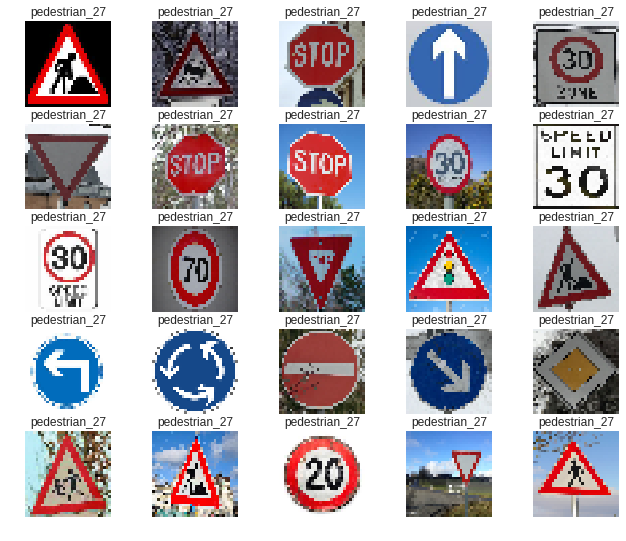

In [32]:
gs1 = gridspec.GridSpec(6, 5)
gs1.update(wspace=0.01, hspace=0.1) # set the spacing between axes.
plt.figure(figsize=(11,11))

downloadDir = "./DownloadsSign"
files = os.listdir(downloadDir)
imagefiles =[]
print("file length..",len(files))
for i, name in enumerate(files):
    filename = name.split(".")
    if filename[-1] != "jpg" and filename[-1] != "png":
        print("Odd filename", name)
        continue
    imagefiles.append(name)
    
        
for i, name in enumerate(imagefiles):        
    #print(name)
    image = cv2.imread( os.path.join(downloadDir,name) )
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)    

    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    #ax1.set_title( name )
    ax1.set_aspect('equal')
    #img = transform_image(image,20,10,5,brightness=1)

    plt.subplot(6,5,i+1)
    plt.title(filename[0])
    plt.imshow(image)
    plt.axis('off')

plt.show()


In [33]:
download_images = loadDownloadImage()
download_colored_images = loadDownloadImage(gray=False)
signname_dict = loadlabelnamelist()


# Predict the Sign Type for Each Image

### Analyze Accuracy Performance against test data


In [34]:
print("-" * 30)
print("    show prediction against downloaded traffic sign board...")

baseDir = "./model"
with tf.Session() as sess:
    #init_op = tf.group(tf.global_variables_initializer(),
    #               tf.local_variables_initializer())
    #sess.run(init_op)
    save_path = os.path.join(baseDir,"lenet2-99")
    saver.restore(sess,save_path )

    acc = []
    for fname, img in sorted(download_images.items(), key=lambda x:x[0]):

        original_idx = int( fname.split("_")[-1] )
        img = img.reshape( (1,)+img.shape )
        #print(img.shape)

        probs_ =  sess.run(tf.nn.softmax(logits), feed_dict = {x:img})   
        #probs_ = sess.run(prob_img, feed_dict = {x:img})
        #print(probs_)
        argidx = np.argmax(probs_)

        if argidx == original_idx:
            acc.append(1)
            accuracy = "** MATCHED **"
        else:
            acc.append(0)
            accuracy = "NO ! WRONG !!"

        print(accuracy, argidx, fname, signname_dict[argidx])

    print("model accuracy : %.4f " % np.mean( acc )  )




------------------------------
    show prediction against downloaded traffic sign board...
INFO:tensorflow:Restoring parameters from ./model/lenet2-99
** MATCHED ** 35 AheadOnly_35 Ahead only
** MATCHED ** 28 ChildrenCrossing_28 Children crossing
NO ! WRONG !! 14 NoEntry_17 Stop
** MATCHED ** 12 PriorityLoad_12 Priority road
NO ! WRONG !! 11 Slippy_23 Right-of-way at the next intersection
** MATCHED ** 13 Yield_13 Yield
** MATCHED ** 38 keep_right_38 Keep right
** MATCHED ** 27 pedestrian_27 Pedestrians
** MATCHED ** 25 roadwork2_25 Road work
NO ! WRONG !! 27 roadwork3_25 Pedestrians
** MATCHED ** 25 roadwork_25 Road work
** MATCHED ** 40 roundabout_40 Roundabout mandatory
** MATCHED ** 26 signals_26 Traffic signals
** MATCHED ** 0 speedlm20a_0 Speed limit (20km/h)
** MATCHED ** 1 speedlm30_1 Speed limit (30km/h)
** MATCHED ** 1 speedlm30a_1 Speed limit (30km/h)
** MATCHED ** 1 speedlm30b_1 Speed limit (30km/h)
NO ! WRONG !! 40 speedlm30c_1 Roundabout mandatory
NO ! WRONG !! 0 speedlm

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [35]:
print("-" * 30)
print("    show Top 5 Softmax probabilties ...")
print("-" * 30)

baseDir = "./model"
#graph = tf.Graph()
#with graph.as_default() as g:
#saver = tf.train.Saver()  # Gets all variables in `graph`.

with tf.Session() as sess:
    init_op = tf.group(tf.global_variables_initializer(),
                   tf.local_variables_initializer())
    sess.run(init_op)
    saver = tf.train.import_meta_graph( os.path.join(  baseDir,"lenet2-99.meta")  )
    save_path = os.path.join(baseDir,"lenet2-99")

    ckpt = tf.train.get_checkpoint_state(baseDir)
    if ckpt and ckpt.model_checkpoint_path:    
        print(ckpt.model_checkpoint_path)
    
    saver.restore(sess,save_path )
    

    top5_labels = {}
    top5_probs = {}
    for fname, img in sorted(download_images.items(), key=lambda x:x[0]):

        original_idx = int( fname.split("_")[-1] )
        img = img.reshape( (1,)+img.shape )
        #print(img.shape)
        
        top_5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x:img})
        label_predicts = [  signname_dict[argidx] for argidx in top_5.indices[0]]
        print("< %s >" % fname.split("_")[0])
        #print(label_predicts)
        #print(top_5.values[0])
        
        for l, v in zip(label_predicts, top_5.values[0]):
            print(" %20s : %.3f  " % (l,v) )
        print("")
        
        top5_labels[fname] = label_predicts
        top5_probs[fname] = top_5.values[0]
        
    #print("model accuracy : %.4f " % np.mean( acc )  )


------------------------------
    show Top 5 Softmax probabilties ...
------------------------------
./model/lenet2-99
INFO:tensorflow:Restoring parameters from ./model/lenet2-99
< AheadOnly >
           Ahead only : 0.793  
                 Stop : 0.073  
      Turn left ahead : 0.026  
 Speed limit (20km/h) : 0.026  
  Go straight or left : 0.020  

< ChildrenCrossing >
    Children crossing : 0.859  
 Right-of-way at the next intersection : 0.047  
   Beware of ice/snow : 0.025  
          Pedestrians : 0.017  
 Road narrows on the right : 0.014  

< NoEntry >
                 Stop : 0.936  
            Keep left : 0.049  
     Turn right ahead : 0.007  
         Double curve : 0.002  
          No vehicles : 0.001  

< PriorityLoad >
        Priority road : 1.000  
                Yield : 0.000  
           Ahead only : 0.000  
 Roundabout mandatory : 0.000  
    Bicycles crossing : 0.000  

< Slippy >
 Right-of-way at the next intersection : 0.176  
   Beware of ice/snow : 0.144 

## Show Probabilities Bar Chart for Downloaded Traffic Sign Board ##

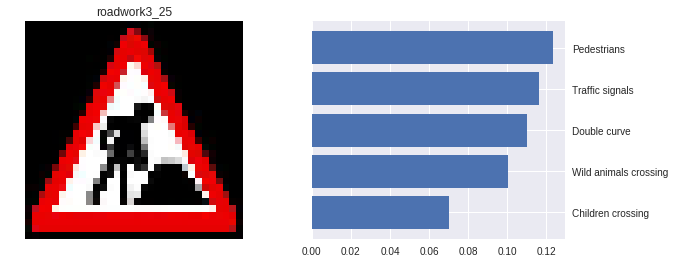

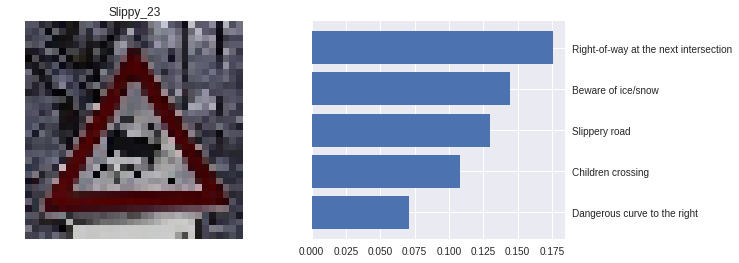

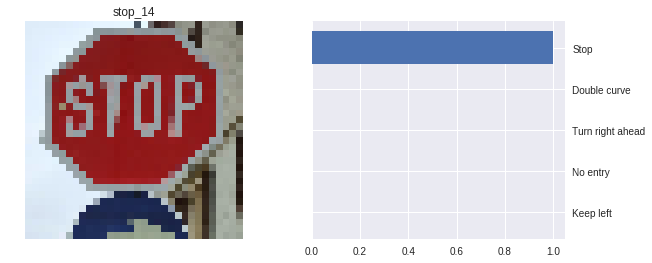

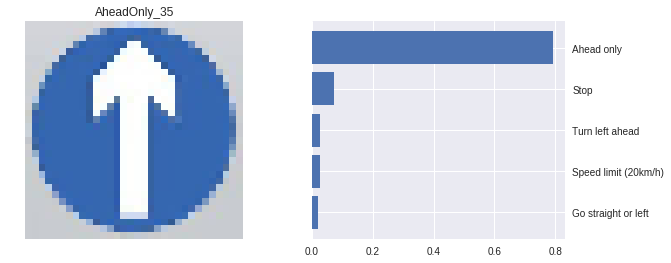

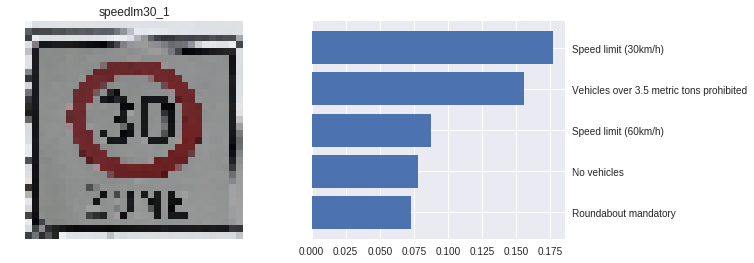

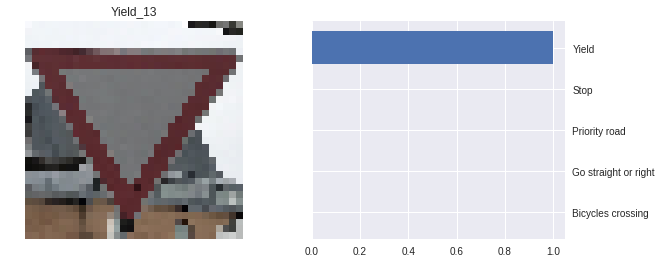

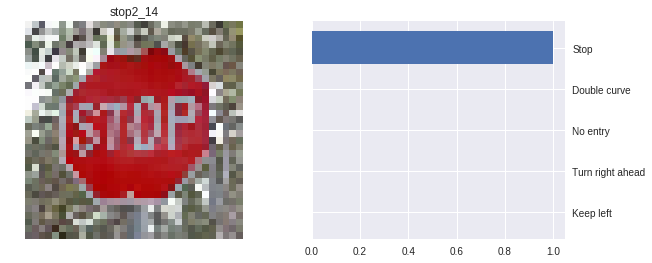

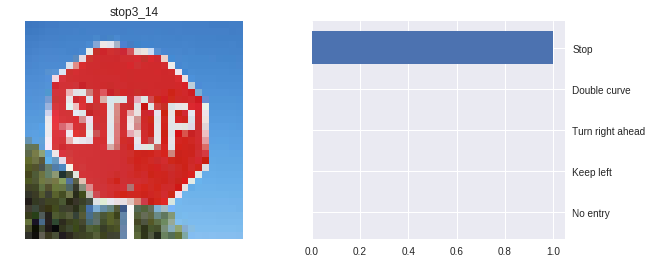

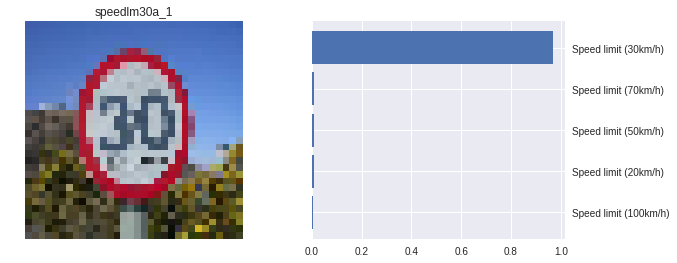

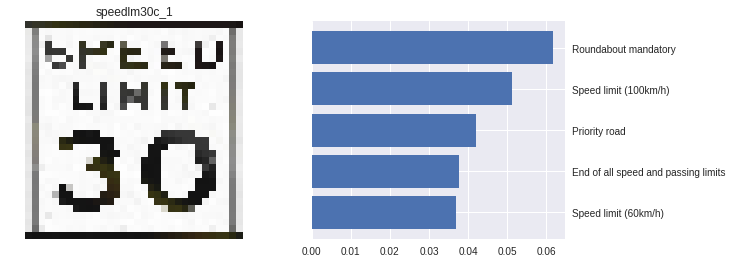

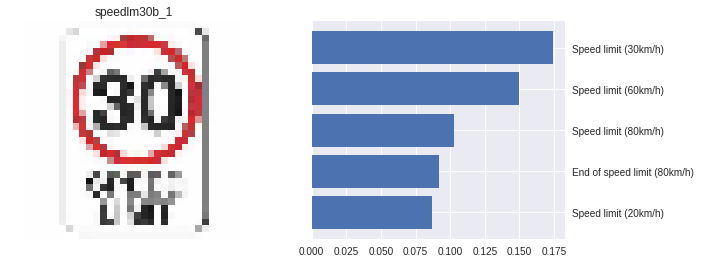

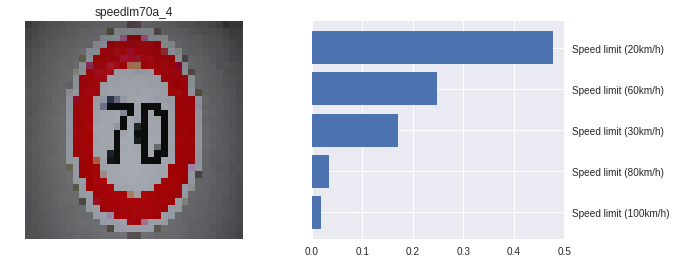

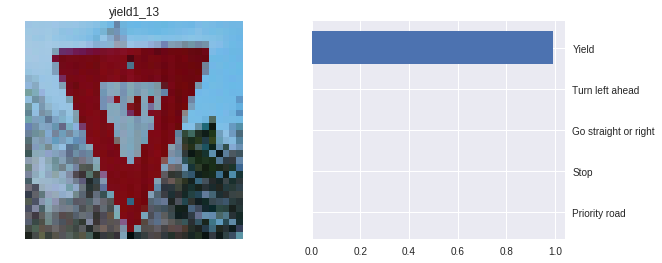

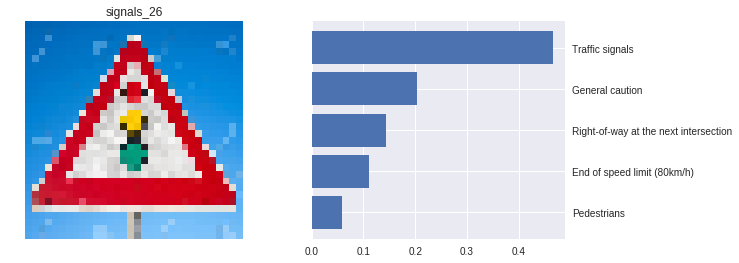

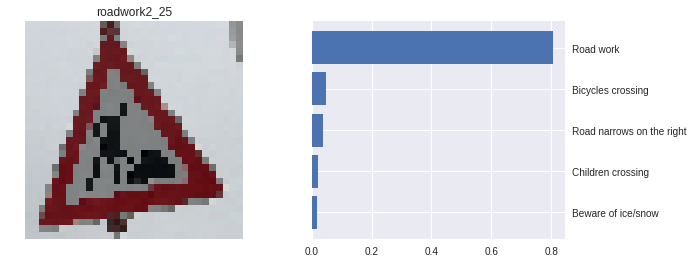

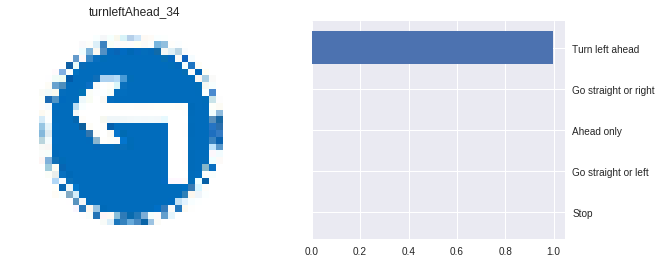

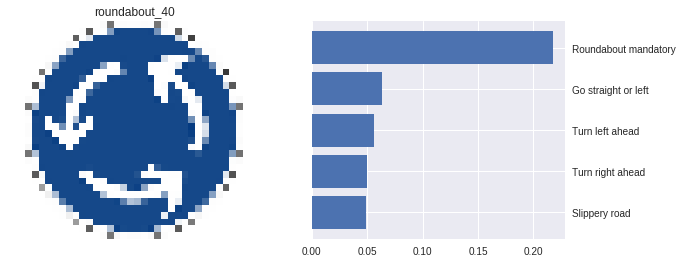

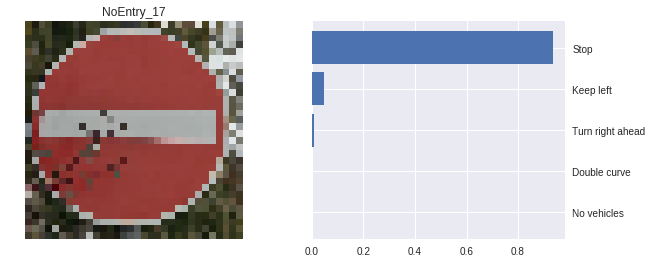

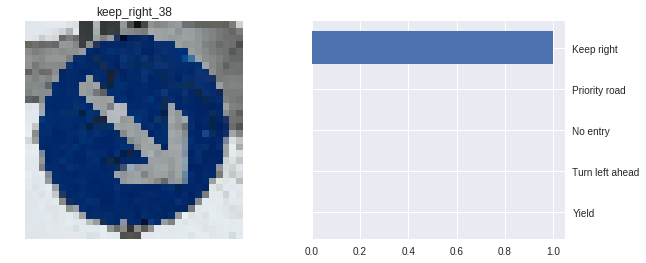

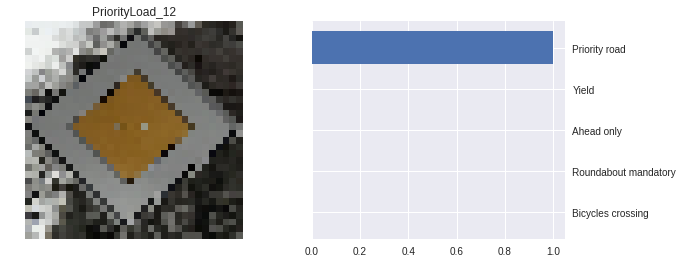

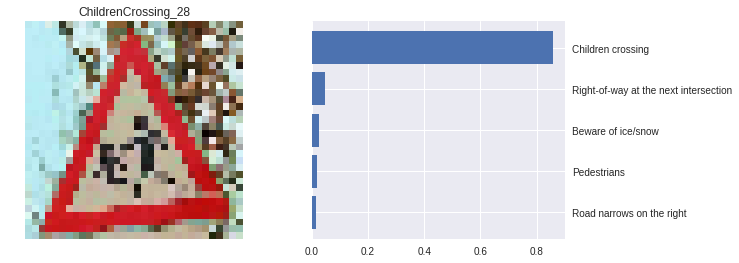

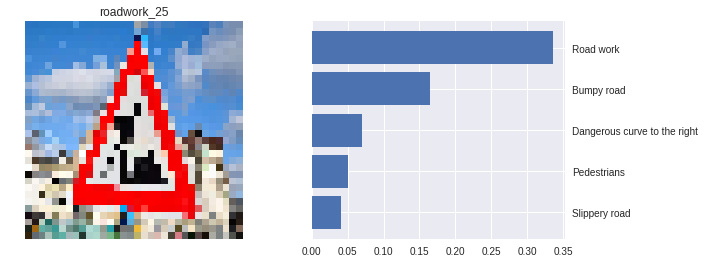

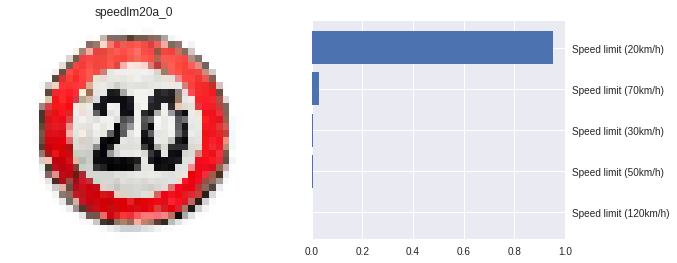

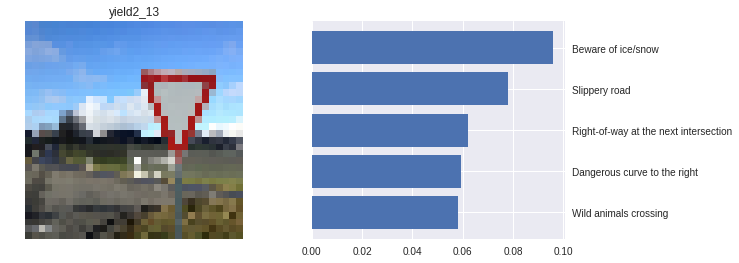

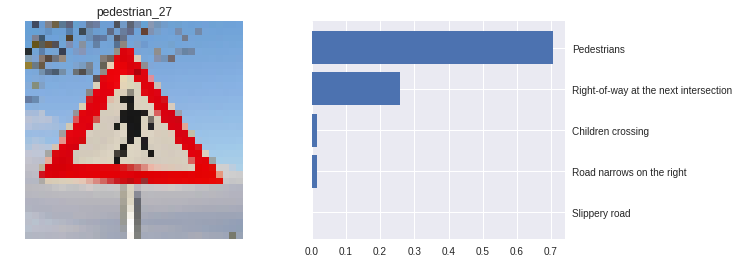

In [36]:
#for i in range(40):
TOP_K = 5
for i, (name,image) in enumerate(download_colored_images.items() ):        

    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    axL.imshow(image)
    axL.axis('off')
    axL.set_title(name)
    
    top5_values = top5_probs[name]
    top5_signlabels = top5_labels[name]
    axR.barh(np.arange(5),top5_values[::-1], align='center')
    axR.set_yticks(range(TOP_K))
    axR.set_yticklabels( top5_signlabels[::-1])
    axR.tick_params(labelleft='off' , labelright='on')    

    
    plt.show();

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [37]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
    plt.show()


In [38]:
images =  np.array( [im for k,im in download_images.items()] ) 
print(images.shape)

(25, 32, 32, 1)


./model/lenet2-99
INFO:tensorflow:Restoring parameters from ./model/lenet2-99


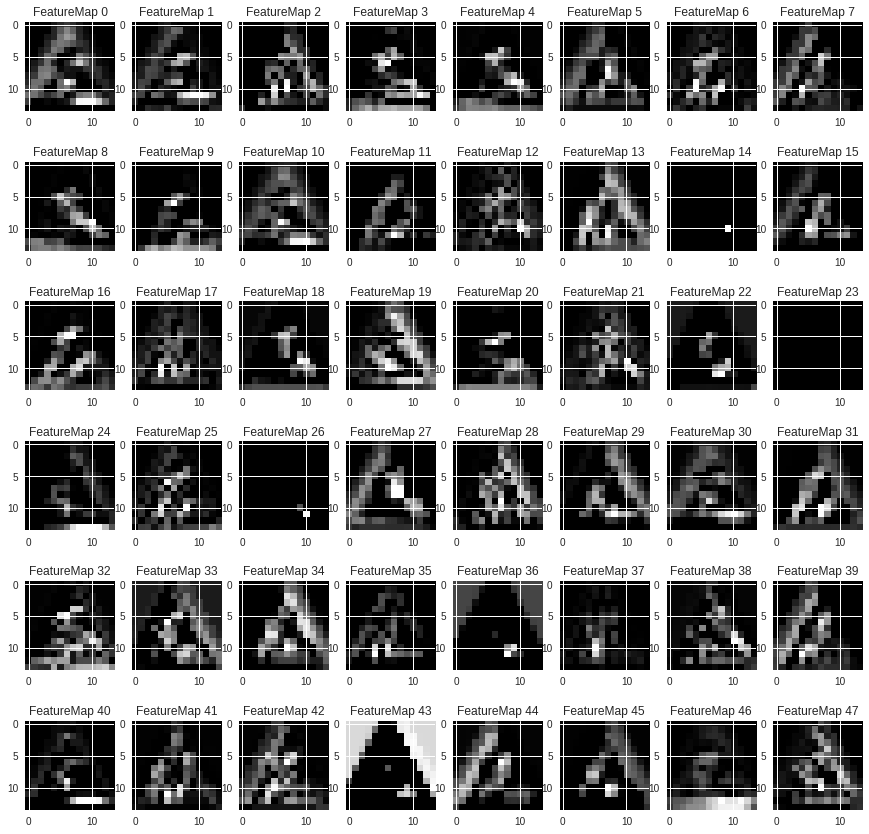

In [46]:
with tf.Session() as sess:

    #var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
    #print([v.name for v in var])
    
    
    saver = tf.train.import_meta_graph( os.path.join(  baseDir,"lenet2-99.meta")  )
    save_path = os.path.join(baseDir,"lenet2-99")

    ckpt = tf.train.get_checkpoint_state(baseDir)
    if ckpt and ckpt.model_checkpoint_path:    
        print(ckpt.model_checkpoint_path)
    
    saver.restore(sess,save_path )
    
    
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('conv1/pool1:0')
    outputFeatureMap(images, conv1, activation_min=-1, activation_max=-1 ,plt_num=1)
    